# Data Checks on: products.csv

#### Contents. 
- Missing Data Check
- Duplicate Check
- Mixed-type Data Check
- Other inconsistency, if needed, check
- Summary if changes to the original dataframe

## Importing libraries and data

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
#importing dataset:
path = r'C:\Users\chris\Documents\Instacart Basket Analysis'
df_prods = pd.read_csv(os.path.join(path,'02 Data', 'Original Data', 'products.csv'))

## Viewing the dataframe

In [3]:
# size:
df_prods.shape

(49693, 5)

In [4]:
# columns:
df_prods.columns

Index(['product_id', 'product_name', 'aisle_id', 'department_id', 'prices'], dtype='object')

In [5]:
# looks:
df_prods

,product_id,product_name,aisle_id,department_id,prices
0,1,Chocolate Sandwich Cookies,61,19,5.8
1,2,All-Seasons Salt,104,13,9.3
2,3,Robust Golden Unsweetened Oolong Tea,94,7,4.5
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1,10.5
4,5,Green Chile Anytime Sauce,5,13,4.3
...,...,...,...,...,...
49688,49684,"Vodka, Triple Distilled, Twist of Vanilla",124,5,5.3
49689,49685,En Croute Roast Hazelnut Cranberry,42,1,3.1
49690,49686,Artisan Baguette,112,3,7.8
49691,49687,Smartblend Healthy Metabolism Dry Cat Food,41,8,4.7


In [6]:
# data types:
df_prods.dtypes

product_id         int64
product_name      object
aisle_id           int64
department_id      int64
prices           float64
dtype: object

In [7]:
# basic stats:
df_prods.describe().round(1)

,product_id,aisle_id,department_id,prices
count,49693.0,49693.0,49693.0,49693.0
mean,24844.3,67.8,11.7,10.0
std,14343.7,38.3,5.9,453.5
min,1.0,1.0,1.0,1.0
25%,12423.0,35.0,7.0,4.1
50%,24845.0,69.0,13.0,7.1
75%,37265.0,100.0,17.0,11.2
max,49688.0,134.0,21.0,99999.0


##### prices looks odd - standard deviation 453.5 and max 99999.0 - needs to be addressed.

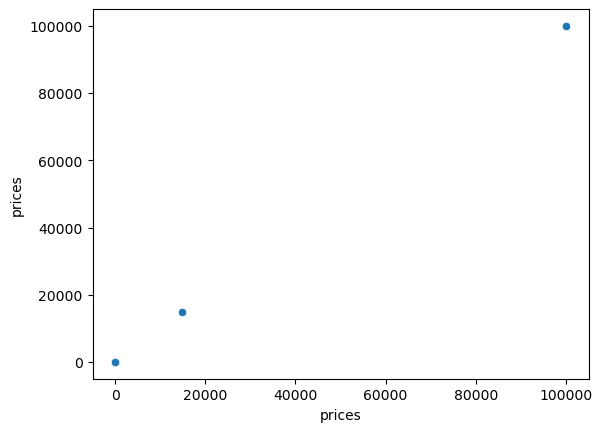

In [8]:
# create a scatterplot to check on the distribution:
scatplot1=sns.scatterplot(x = 'prices', y = 'prices',data = df_prods)

##### Scatterplot shows, that the max price is an outlier, that disturbs all statistics. Needs to be addressed.

### Missing Data Check

In [9]:
# checking for any missing values:
df_prods.isnull().sum()

product_id        0
product_name     16
aisle_id          0
department_id     0
prices            0
dtype: int64

In [10]:
#Creating a subset only with those missing values in 'product name':
df_nan = df_prods[df_prods['product_name'].isnull() == True]
df_nan

,product_id,product_name,aisle_id,department_id,prices
33,34,NaN,121,14,12.2
68,69,NaN,26,7,11.8
115,116,NaN,93,3,10.8
261,262,NaN,110,13,12.1
525,525,NaN,109,11,1.2
1511,1511,NaN,84,16,14.3
1780,1780,NaN,126,11,12.3
2240,2240,NaN,52,1,14.2
2586,2586,NaN,104,13,12.4
3159,3159,NaN,126,11,13.1


##### Those 16 rows can be deleted. 

### Duplicated Data Check

In [11]:
# looking for duplicates:
df_dups = df_prods[df_prods.duplicated()]
df_dups

,product_id,product_name,aisle_id,department_id,prices
462,462,Fiber 4g Gummy Dietary Supplement,70,11,4.8
18459,18458,Ranger IPA,27,5,9.2
26810,26808,Black House Coffee Roasty Stout Beer,27,5,13.4
35309,35306,Gluten Free Organic Peanut Butter & Chocolate ...,121,14,6.8
35495,35491,Adore Forever Body Wash,127,11,9.9


##### 5 duplicates found - needs to be deleted.

### Mixed-typed Data Check

In [12]:
# checking for mixed-typed data:
for col in df_prods.columns.tolist():
  weird = (df_prods[[col]].applymap(type) != df_prods[[col]].iloc[0].apply(type)).any(axis = 1)
  if len (df_prods[weird]) > 0:
    print (col)

product_name


##### The mix comes from those missing values. 

## Summary: What needs to be addressed:

##### outliers in prices > delete if only some rows, turn into NaN if many rows.
#####  in the column products are 16 missing product names - can be deleted.
#####  5 duplicated rows - can be deleted.
#####  columns 'product_id' 'aisle_id' and 'department_id' can be changed into string variables.

## Changing and Exporting the dataframe >> products_wrangled.pkl

##### Changing data types into strings for convenience

In [13]:
# changing ids into string variables:
df_prods[['product_id', 'aisle_id', 'department_id']] = df_prods[['product_id', 'aisle_id', 'department_id']].astype(str)

#### Addressing the outliers:

In [14]:
# defining prices over 100 as outliers. Creating a subset to check how many outliers there are:
subset_prices =  df_prods[df_prods['prices']>100]

In [15]:
subset_prices.head()

,product_id,product_name,aisle_id,department_id,prices
21554,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0
33666,33664,2 % Reduced Fat Milk,84,16,99999.0


In [16]:
# creating new dataframe without outliers:
df_prods_clean = df_prods[df_prods['prices'] <= 100]

In [17]:
# checking how many rows have been deleted, it should be 2:
deleted_rows = len(df_prods) - len(df_prods_clean)
print(deleted_rows)

2


In [18]:
# checking stats again with table:
df_prods_clean.describe().round(1)

,prices
count,49691.0
mean,7.7
std,4.2
min,1.0
25%,4.1
50%,7.1
75%,11.2
max,25.0


##### That mean and max prices look normal. Standard deviation as well. No more changes made.

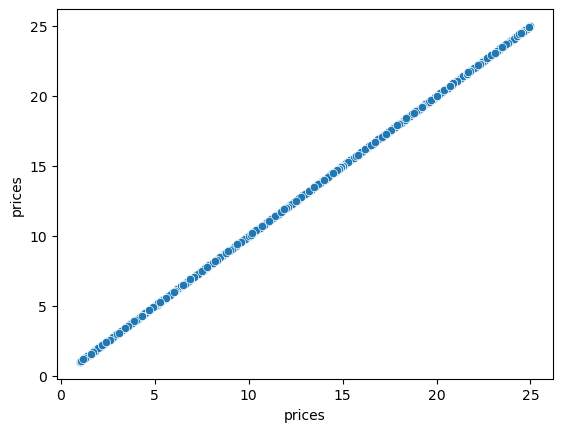

In [19]:
# checking stats again with scatterplot:
scatplot2=sns.scatterplot(x = 'prices', y = 'prices',data = df_prods_clean)

#### Deleting 16 rows with missing values in 'product_name'

In [20]:
# creating an new dataframe WITHOUT the MISSING values (isnull = False)
df_prods_clean2 = df_prods_clean[df_prods_clean['product_name'].isnull() == False]

In [21]:
# checking how many rows have been deleted, it should be 16:
deleted_rows2 = len(df_prods_clean) - len(df_prods_clean2)
print(deleted_rows2)

16


#### Deleting the duplicates

In [22]:
# creating an new dataframe without duplicates:
df_prods_clean3 = df_prods_clean2.drop_duplicates()

In [23]:
# checking how many rows have been deleted, it should be 5:
deleted_rows3 = len(df_prods_clean2) - len(df_prods_clean3)
print(deleted_rows3)

5


#### Checking on all changes:

In [24]:
# looks:
df_prods_clean3

,product_id,product_name,aisle_id,department_id,prices
0,1,Chocolate Sandwich Cookies,61,19,5.8
1,2,All-Seasons Salt,104,13,9.3
2,3,Robust Golden Unsweetened Oolong Tea,94,7,4.5
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1,10.5
4,5,Green Chile Anytime Sauce,5,13,4.3
...,...,...,...,...,...
49688,49684,"Vodka, Triple Distilled, Twist of Vanilla",124,5,5.3
49689,49685,En Croute Roast Hazelnut Cranberry,42,1,3.1
49690,49686,Artisan Baguette,112,3,7.8
49691,49687,Smartblend Healthy Metabolism Dry Cat Food,41,8,4.7


In [25]:
# checking how many rows have been deleted, it should be 2 + 16 + 5 = 23:
deleted_rows4 = len(df_prods) - len(df_prods_clean3)
print(deleted_rows4)

23


In [26]:
# data types:
df_prods_clean3.dtypes

product_id        object
product_name      object
aisle_id          object
department_id     object
prices           float64
dtype: object

In [27]:
# statistics
df_prods_clean3.describe().round(1)

,prices
count,49670.0
mean,7.7
std,4.2
min,1.0
25%,4.1
50%,7.1
75%,11.1
max,25.0


In [29]:
df_prods_clean3.shape

(49670, 5)

##### Exporting the cleaned dataframe as a pickle

In [28]:
# exporting the dataframe:
df_prods_clean3.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'products_wrangled.pkl'))